In [5]:
%load_ext autoreload
%autoreload 2

import sys
if '..' not in sys.path:
    sys.path.append('..')

In [61]:
import conllu

with open('../data/ud/en_ewt-ud-train.conllu', 'r') as f:
    sentences = conllu.parse(f.read())

In [2]:
!python ../dep.py ../data/en_ewt-ud-train.conllu ../data/ud.jsonl --weight=0.1

100%|███████████████████████████████████| 12544/12544 [00:04<00:00, 2549.80it/s]
generated 12544 noising trajectories
avg length 5.66047512755102


(array([895., 532., 295., 155.,  66.,  35.,  11.,   6.,   4.,   2.]),
 array([ 3. , 12.3, 21.6, 30.9, 40.2, 49.5, 58.8, 68.1, 77.4, 86.7, 96. ]),
 <BarContainer object of 10 artists>)

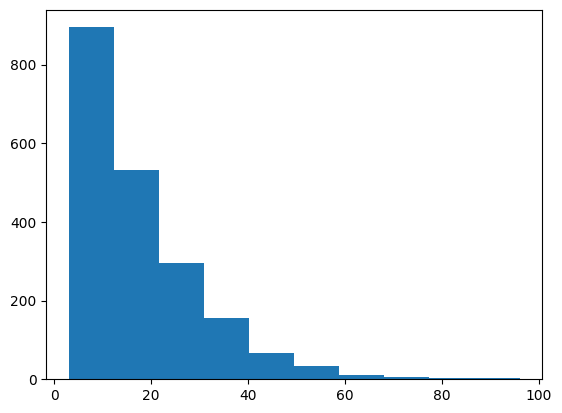

In [13]:
import matplotlib.pyplot as plt

plt.hist([len(id) for id in ids['input_ids']])

In [25]:
from model import Evolver
from data import TrainLoader
from train import train_evolver
from torch.optim import AdamW
from transformers import BertTokenizer

evolver = Evolver(
    d_model=512,
    nhead=8,
    max_len=64,
    encoder_layers=6,
    decoder_layers=6,
    device='cpu'
)

optim = AdamW(evolver.parameters(), lr=3e-4)

Tokenizing inputs: 100%|██████████| 12544/12544 [00:12<00:00, 970.66it/s] 


In [10]:
from data import EvalDataset
from transformers import BertTokenizer

eval_dataset = EvalDataset.from_disk(
    path='../data/ud/en_ewt-ud-dev.conllu',
    num_samples=1,
    max_len=64,
    tokenizer=BertTokenizer.from_pretrained('bert-base-uncased'),
    limit=100
)

Noising observations: 100%|██████████| 2001/2001 [00:00<00:00, 3089.15it/s]


In [22]:
from data import TrainDataset
from transformers import BertTokenizer

train_dataset = TrainDataset.from_disk(
    path='../data/ud/ud.jsonl',
    max_len=64,
    tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
)

Tokenizing inputs: 100%|██████████| 12544/12544 [00:15<00:00, 786.87it/s]


In [20]:
!python ../train.py \
    --train ../data/ud/ud.jsonl \
    --eval ../data/ud/en_ewt-ud-dev.conllu \
    --config ../configs/ud.json \
    --prefix ud-1.0.0 \
    --device cpu

Noising observations: 100%|███████████████| 2001/2001 [00:00<00:00, 3521.04it/s]
INFO:__main__:starting epoch: 1
sampling batch:   2%|▋                          | 3/128 [00:17<12:14,  5.88s/it]
Traceback (most recent call last):
  File "../train.py", line 247, in <module>
    main()
  File "../train.py", line 233, in main
    train_evolver(
  File "../train.py", line 92, in train_evolver
    sample_batch(evolver, batch_ids, num_particles, threshold, temperature, device)
  File "/Users/bai/argo/projects/ddm/evolver/run.py", line 40, in sample_batch
    cur_tgts, _ = sample_trajectory(
  File "/Users/bai/argo/projects/ddm/evolver/run.py", line 71, in sample_trajectory
    edit_tgts, src, log_prob = particle_filter(
  File "/Users/bai/argo/projects/ddm/evolver/run.py", line 109, in particle_filter
    edit_logits, tgt, memory, cache = evolver.forward(
  File "/Users/bai/argo/projects/ddm/evolver/model.py", line 267, in forward
    memory = self.encoder(src, src_key_padding_mask=src_pad_ma